### <font color=darkred> [MSA : Modélisation, Apprentissage et Applications] </font>
### <font color = darkblue> <div style="text-align: center"> Projet de fin d'études
### <font color = darkgreen> <div style="text-align: center"> Apprentissage sur les données de l'article : Predicting Individual Thermal Comfort/ML
### <font color = darkgreen> <div style="text-align: center"> [Smart Building & OZE Energies]
#### <font color = darkblue> <div style="text-align: right"> Binôme : Jordan CHEMOUHOUM, Alaeddine ZEKRI


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Format des données
import pandas as pd
import numpy as np

#Outils de graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ACP
from sklearn.preprocessing import StandardScaler

#Label Encoder
from sklearn import preprocessing

#Machine Learning tools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Machine Learning Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
from random import randint

# Jeu de données Université de sydney

### I.1) Prépration des données

#### Traitement primaire

In [7]:
data_sydney47 = pd.read_excel('data/47_EXL.XLS')
data_sydney48 = pd.read_excel('data/48_EXL.XLS')

In [8]:
data_sydney48.head(6)

,"K. Cena and R. J. de Dear. Summer, 1997. ASHRAE's RP-921 study in Kalgoorlie, Australia.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,Basic Identifiers,NaN,NaN,NaN,NaN,NaN,NaN,Thermal Questionnaire,NaN,NaN,...,NaN,Outdoor Meteorological Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,blcode,NaN,age,NaN,year,(Julian),time,NaN,prxy_tsa,NaN,...,PCED7,NaN,OUT_MIN_TA,NaN,COINC_RH1,NaN,OUT_AVE_RH,NaN,OUT_MIN_ET,NaN
4,NaN,sub,NaN,sex,NaN,day number,NaN,ash,NaN,tsa,...,NaN,OUT_MAX_TA,NaN,OUT_AVE_TA,NaN,COINC_RH2,NaN,OUT_MAX_ET,NaN,OUT_AVE_ET
5,13,1,50,1,1997,335,845,2,1,2,...,.,41.2,22.2,31.7,6.1,50.7,28.4,34.6,22.2,28.4


In [9]:
data_sydney47.shape

(645, 80)

In [10]:
data_sydney48.shape

(598, 80)

In [11]:
#les titres des colonnes sont les lignes 3 et 4
L = list(data_sydney47.loc[3,:])
G = list(data_sydney47.loc[4,:])

col = []
for i in range(len(G)):
    if isinstance(G[i],str):
        col.append(G[i])
    else:
        col.append(L[i])

In [12]:
data_sydney47.columns = col
data_sydney47 = data_sydney47.loc[5:,:]

data_sydney48.columns = col
data_sydney48 = data_sydney48.loc[5:,:]

In [13]:
data_sydney47.head(1)

,blcode,sub,age,sex,year,day,time,ash,prxy_tsa,tsa,...,PCED7,OUT_MAX_TA,OUT_MIN_TA,OUT_AVE_TA,COINC_RH1,COINC_RH2,OUT_AVE_RH,OUT_MAX_ET,OUT_MIN_ET,OUT_AVE_ET
5,1,1,55,1,1997,135,1101,-1,2,2,...,2,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3


In [14]:
# il y a en tout ... NaN
sum(data_sydney47.isnull().sum(axis = 0))

33

In [15]:
data_sydney48.head(1)

,blcode,sub,age,sex,year,day,time,ash,prxy_tsa,tsa,...,PCED7,OUT_MAX_TA,OUT_MIN_TA,OUT_AVE_TA,COINC_RH1,COINC_RH2,OUT_AVE_RH,OUT_MAX_ET,OUT_MIN_ET,OUT_AVE_ET
5,13,1,50,1,1997,335,845,2,1,2,...,.,41.2,22.2,31.7,6.1,50.7,28.4,34.6,22.2,28.4


In [16]:
# il y a en tout ... NaN
sum(data_sydney48.isnull().sum(axis = 0))

2989

In [17]:
#Certaines colonnes doivent être complètement vides : 
df = pd.DataFrame(data_sydney48.isnull().sum(axis = 0))
df.columns = ['sommedesNaN']

In [18]:
ind = df[df.sommedesNaN >500].index
df[df.sommedesNaN >500]
#nous les retirerons sur le DataFrame fusionné

,sommedesNaN
pa,593
pd_h,593
pd_m,593
pd_l,593
PCC_AG,593


On ajoute une variable 'Season' pour chaque DF: 

In [19]:
# 0 pour winter, 1 pour summer
data_sydney47['Season'] = 0
data_sydney48['Season'] = 1

In [20]:
data_sydney = pd.concat([data_sydney47,data_sydney48],axis = 0)

In [21]:
data_sydney.head(1)

,blcode,sub,age,sex,year,day,time,ash,prxy_tsa,tsa,...,OUT_MAX_TA,OUT_MIN_TA,OUT_AVE_TA,COINC_RH1,COINC_RH2,OUT_AVE_RH,OUT_MAX_ET,OUT_MIN_ET,OUT_AVE_ET,Season
5,1,1,55,1,1997,135,1101,-1,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0


#### Traitement des Nan

In [22]:
data_sydney.reset_index(inplace=True)

In [23]:
#On retire les colonnes avec plus de 500 NaN 
df = pd.DataFrame(data_sydney.isnull().sum(axis = 0))
df.columns = ['sommedesNaN']
df.reset_index(inplace = True)
ind = df[df.sommedesNaN > 500].index

u = [i for i in range(82)]
data_sydney = data_sydney.iloc[:, [x for x in u if x not in ind]]

** Nous allons dans un premier temps supprimer les lignes qui contiennent NaN**

In [24]:
print('il y a ' + str(sum(data_sydney.isnull().sum(axis = 0))) + ' NaN')

il y a 54 NaN


In [25]:
data_sydney = data_sydney.dropna()

In [26]:
print('il y a ' + str(sum(data_sydney.isnull().sum(axis = 0))) + ' NaN')

il y a 0 NaN


In [27]:
data_sydney.drop(['index'],inplace = True,axis=1)
data_sydney.head()

,blcode,sub,age,sex,year,day,time,ash,prxy_tsa,tsa,...,OUT_MAX_TA,OUT_MIN_TA,OUT_AVE_TA,COINC_RH1,COINC_RH2,OUT_AVE_RH,OUT_MAX_ET,OUT_MIN_ET,OUT_AVE_ET,Season
0,1,1,55,1,1997,135,1101,-1,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0
1,1,2,41,2,1997,135,1105,0.2,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0
2,1,3,57,1,1997,135,1110,-0.5,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0
3,1,4,46,1,1997,135,1126,0.2,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0
4,1,5,46,1,1997,135,1135,1,2,2,...,20.3,9.9,15.1,57,97,77,20.4,10.1,15.3,0


In [29]:
data_sydney.shape

(1214, 76)

### I.2) Machine Learning

### I.2.1) Cas de l'article ~ Essayons de retrouver les résultats

In [30]:
data_sydney.columns

Index(['blcode', 'sub', 'age', 'sex', 'year', 'day', 'time', 'ash', 'prxy_tsa',
       'tsa', 'mci', 'vent', 'avm', 'comf', 'act10', 'act20', 'act30', 'act60',
       'met', 'clo', 'upholst', 'insul', 'ta_h', 'ta_m', 'ta_l', 'dewpt',
       'prta_b', 'tg_h', 'tg_m', 'tg_l', 'vel_h', 'vel_m', 'vel_l', 'turb_h',
       'turb_m', 'turb_l', 'taav', 'trav', 'top', 'velav', 'velmax', 'tuav',
       'rh', 'c_et', 'c_set', 'c_tsens', 'c_disc', 'c_pmv', 'c_ppd', 'pd',
       'PCC', 'PCS', 'PCEC1', 'PCEC2', 'PCEC3', 'PCEC4', 'PCEC5', 'PCEC6',
       'PCEC7', 'PCED1', 'PCED2', 'PCED3', 'PCED4', 'PCED5', 'PCED6', 'PCED7',
       'OUT_MAX_TA', 'OUT_MIN_TA', 'OUT_AVE_TA', 'COINC_RH1', 'COINC_RH2',
       'OUT_AVE_RH', 'OUT_MAX_ET', 'OUT_MIN_ET', 'OUT_AVE_ET', 'Season'],
      dtype='object')

In [31]:
# si nous voulons le même cas que dans l'article
y = data_sydney['mci']
y.replace([1,2,3],[-1,0,1],inplace = True)

In [32]:
# on choisit la température taav
data_article = data_sydney[['age','clo','met','taav','trav','tuav','OUT_AVE_TA']]

In [33]:
data_article.loc[1209,'age']

'.'

In [34]:
#on peut voir qu'il y a des '.'. Quels sont leur index ?
ind = []
for i in data_article.index:
    for column in data_article.columns:
        if isinstance(data_article.loc[i,column],str):
            ind.append(i)

In [35]:
print(ind)

[52, 52, 58, 58, 68, 68, 72, 72, 92, 321, 326, 327, 329, 333, 370, 371, 451, 866, 900, 928, 999, 1047, 1096, 1209]


In [36]:
#Nous retirons ces colonnes
data_article.drop(ind,axis=0,inplace=True)
y.drop(ind,axis=0,inplace=True)

In [37]:
#normalisation 
from sklearn import preprocessing

x = data_article.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_article = pd.DataFrame(x_scaled)
df_article.columns = data_article.columns

In [38]:
#nous avons donc des données normalisées
df_article.head(1)

,age,clo,met,taav,trav,tuav,OUT_AVE_TA
0,0.764706,0.18797,0.506445,0.511676,0.420424,0.173561,0.262222


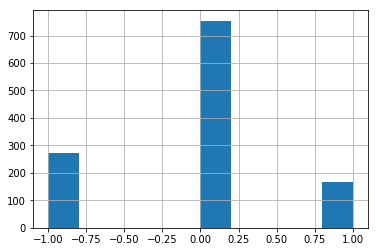

In [39]:
y.hist()

In [40]:
y = y.reset_index()
y = y['mci']
#on voit que le jeu de données est désiquilibré. On va donc sélectionner le même nombre pour chaque label(min)
y_1 = y[y == 1]
y_0 = y[y == 0]
y_m1 = y[y == -1]

In [41]:
print(len(y_m1),len(y_0),len(y_1))

273 754 167


In [42]:
import random
index_choosen_0 = random.sample(list(y_0.index), len(y_1))
index_choosen_m1 = random.sample(list(y_m1.index), len(y_1))

l = index_choosen_0 + index_choosen_m1 + list(y_1.index)
df_article = df_article.loc[l,:]

In [43]:
y = y[l]

In [44]:
df_article.head(1)

,age,clo,met,taav,trav,tuav,OUT_AVE_TA
688,0.784314,0.120301,0.34375,0.313645,0.266651,0.224332,0.728889


### prediction

In [45]:
#répartition des données en 70% train et 30% test de façon aléatoire
X_train_art, X_test_art, y_train_art, y_test_art = train_test_split(df_article,list(y), test_size=0.3, random_state=32)

In [46]:
classif = RandomForestClassifier()

#Entrainement du classifieur
classif.fit(X_train_art, y_train_art)

#Prédiction sur X_test
y_predicted_art = classif.predict(X_test_art)

#Evaluation des performances
print('Performances de DecisionTreeClassifier')
from sklearn.metrics import confusion_matrix
cond_RF = pd.DataFrame(confusion_matrix(y_test_art,y_predicted_art))
cond_RF.columns = ['-1','0','1']
cond_RF.index = ['-1','0','1']
cond_RF['total(pred)'] = cond_RF['-1'] + cond_RF['0'] + cond_RF['1']
cond_RF.loc['total(real)',:] = cond_RF.loc['-1',:] + cond_RF.loc['0',:] + cond_RF.loc['1',:]
cond_RF

Performances de DecisionTreeClassifier


,-1,0,1,total(pred)
-1,22.0,12.0,10.0,44.0
0,13.0,20.0,16.0,49.0
1,12.0,17.0,29.0,58.0
total(real),47.0,49.0,55.0,151.0


In [47]:
classif = SVC()

#Entrainement du classifieur
classif.fit(X_train_art, y_train_art)

#Prédiction sur X_test
y_predicted_art = classif.predict(X_test_art)

#Evaluation des performances
print('Performances de DecisionTreeClassifier')
from sklearn.metrics import confusion_matrix
cond_svm = pd.DataFrame(confusion_matrix(y_test_art,y_predicted_art))
cond_svm.columns = ['-1','0','1']
cond_svm.index = ['-1','0','1']
cond_svm['total(pred)'] = cond_svm['-1'] + cond_svm['0'] + cond_svm['1']
cond_svm.loc['total(real)',:] = cond_svm.loc['-1',:] + cond_svm.loc['0',:] + cond_svm.loc['1',:]
cond_svm

Performances de DecisionTreeClassifier


,-1,0,1,total(pred)
-1,21.0,11.0,12.0,44.0
0,15.0,16.0,18.0,49.0
1,8.0,14.0,36.0,58.0
total(real),44.0,41.0,66.0,151.0


In [48]:
def macro_average_modified_test(cond):
    c = len(cond) - 1
    pipii = []
    for i in range(c):
        pi = cond.iloc[i,i]/cond.iloc[i,c]
        pii = cond.iloc[i,i]/cond.iloc[c,i]
        pipii.append(pi*pii)
    
    prod = 1
    prod = [prod*i for i in pipii][0]
    result = 0.75*sum(pipii) + 0.25*c*((prod)**(1/c))
    return(result)

In [49]:
macro_average_modified_test(cond_RF)

0.9604031506392283

In [50]:
macro_average_modified_test(cond_svm)

0.9783727663947834

On retrouve que SVM outperform légèrement RF

### I.2.2) Améliorations possibles

#### 1.2.2.a) Paramètres du classifieur

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train_art, y_train_art)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [54]:
clf.best_score_

0.5171428571428571

In [55]:
best_clf = svm.SVC(C=1,kernel='linear')
best_clf.fit(X_train_art, y_train_art)
#Prédiction sur X_test
y_predicted_art = best_clf.predict(X_test_art)

#Evaluation des performances
print('Performances de SVM')
cond_svm = pd.DataFrame(confusion_matrix(y_test_art,y_predicted_art))
cond_svm.columns = ['-1','0','1']
cond_svm.index = ['-1','0','1']
cond_svm['total(pred)'] = cond_svm['-1'] + cond_svm['0'] + cond_svm['1']
cond_svm.loc['total(real)',:] = cond_svm.loc['-1',:] + cond_svm.loc['0',:] + cond_svm.loc['1',:]
cond_svm

Performances de SVM


,-1,0,1,total(pred)
-1,23.0,9.0,12.0,44.0
0,17.0,13.0,19.0,49.0
1,9.0,13.0,36.0,58.0
total(real),49.0,35.0,67.0,151.0


In [56]:
macro_average_modified_test(cond_svm)

0.9775869488039577

#### 1.2.2.b) Comparaison sans sélection de variables

In [57]:
#on peut voir qu'il y a des '.'. Quels sont leur index ?
indi = []
data_s = data_sydney.drop(['turb_m'],axis=1)
for i in data_s.index:
    for column in data_s.columns:
        if isinstance(data_s.loc[i,column],str):
            indi.append(i)
indi = set(indi)
indi = list(indi)

In [58]:
data_s = data_sydney.drop(indi,axis=0)

In [59]:
y_a = data_s['mci']
X_a = data_s[['blcode', 'sub', 'age', 'sex', 'year', 'day', 'time', 'ash', 'prxy_tsa',
       'tsa', 'vent', 'avm', 'comf', 'act10', 'act20', 'act30', 'act60',
       'met', 'clo', 'upholst', 'insul', 'ta_h', 'ta_m', 'ta_l', 'dewpt',
       'prta_b', 'tg_h', 'tg_m', 'tg_l', 'vel_h', 'vel_m', 'vel_l', 'turb_h', 'turb_l', 'taav', 'trav', 'top', 'velav', 'velmax', 'tuav',
       'rh', 'c_et', 'c_set', 'c_tsens', 'c_disc', 'c_pmv', 'c_ppd', 'pd',
       'PCC', 'PCS', 'PCEC1', 'PCEC2', 'PCEC3', 'PCEC4', 'PCEC5', 'PCEC6',
       'PCEC7', 'PCED1', 'PCED2', 'PCED3', 'PCED4', 'PCED5', 'PCED6', 'PCED7',
       'OUT_MAX_TA', 'OUT_MIN_TA', 'OUT_AVE_TA', 'COINC_RH1', 'COINC_RH2',
       'OUT_AVE_RH', 'OUT_MAX_ET', 'OUT_MIN_ET', 'OUT_AVE_ET', 'Season']]
X_train_ar, X_test_ar, y_train_ar, y_test_ar = train_test_split(X_a,y_a, test_size=0.3, random_state=32)

In [61]:
classif = RandomForestClassifier()

#Entrainement du classifieur
classif.fit(X_train_art, y_train_art)

#Prédiction sur X_test
y_predicted_art = classif.predict(X_test_art)

#Evaluation des performances
print('Performances de Random Forest')
from sklearn.metrics import confusion_matrix
cond_RF = pd.DataFrame(confusion_matrix(y_test_art,y_predicted_art))
cond_RF.columns = ['-1','0','1']
cond_RF.index = ['-1','0','1']
cond_RF['total(pred)'] = cond_RF['-1'] + cond_RF['0'] + cond_RF['1']
cond_RF.loc['total(real)',:] = cond_RF.loc['-1',:] + cond_RF.loc['0',:] + cond_RF.loc['1',:]
cond_RF

Performances de Random Forest


,-1,0,1,total(pred)
-1,23.0,11.0,10.0,44.0
0,14.0,22.0,13.0,49.0
1,12.0,20.0,26.0,58.0
total(real),49.0,53.0,49.0,151.0


In [62]:
macro_average_modified_test(cond_RF)

0.971723737767441

In [63]:
classif = SVC()

#Entrainement du classifieur
classif.fit(X_train_art, y_train_art)

#Prédiction sur X_test
y_predicted_art = classif.predict(X_test_art)

#Evaluation des performances
print('Performances de SVM')
from sklearn.metrics import confusion_matrix
cond_svm = pd.DataFrame(confusion_matrix(y_test_art,y_predicted_art))
cond_svm.columns = ['-1','0','1']
cond_svm.index = ['-1','0','1']
cond_svm['total(pred)'] = cond_svm['-1'] + cond_svm['0'] + cond_svm['1']
cond_svm.loc['total(real)',:] = cond_svm.loc['-1',:] + cond_svm.loc['0',:] + cond_svm.loc['1',:]
cond_svm

Performances de SVM


,-1,0,1,total(pred)
-1,21.0,11.0,12.0,44.0
0,15.0,16.0,18.0,49.0
1,8.0,14.0,36.0,58.0
total(real),44.0,41.0,66.0,151.0


In [64]:
macro_average_modified_test(cond_svm)

0.9783727663947834

Le choix des variables est plutôt judicieux dans l'article. Ceux sont les variables les plus significatives.